# <span style="color:#0b486b">  FIT5215: Deep Learning (2021)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Dr **Tuan Nguyen** | tuan.ng@monash.edu <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Sunthornjittanon**  <br/>
Firstname: **Pichaphop**    <br/>
Student ID: **31258301**    <br/>
Email: **psun0009@student.monash.edu**    <br/>
Your tutorial time: **Wed 4pm - 6pm & Fri 4pm - 6pm**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:00pm Sunday, 16 January 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [1]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras


We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [2]:
# Download fashion mnist data
fashion_mnist = keras.datasets.fashion_mnist

# Store data into train and test X, Y
(X_train_full_img, y_train_full), (X_test_img, y_test) =  fashion_mnist.load_data() #Insert your code here

# Print the shape of the data
print(f'The shape of X_train_full_img is {X_train_full_img.shape} and that of X_test_img is {X_test_img.shape} ')

The shape of X_train_full_img is (60000, 28, 28) and that of X_test_img is (10000, 28, 28) 


The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [3]:
# Get the number of training data points
num_train = X_train_full_img.shape[0]

# Get the number of testing data points
num_test = X_test_img.shape[0]

# Reshape the training data by reducing one dimension 
X_train_full =  X_train_full_img.reshape(num_train,-1) #Insert your code here

# Reshape the testing data by reducing one dimension 
X_test =   X_test_img.reshape(num_test,-1) #Insert your code here

# Display the shape of X_train_full,y_train_full,X_test and y_test
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Print out the dimensions of X_train_full and X_test
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the piels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [4]:
# Print out the dimensions of X_train_full and X_test
print(f'''After reshaping, The shape of X_train_full  is {X_train_full.shape} 
      and that of X_test_img is {X_test.shape}''')

After reshaping, The shape of X_train_full  is (60000, 784) 
      and that of X_test_img is (10000, 784)


In [5]:
# import math library
import math

# Get the number of records in X_train_full
N = X_train_full.shape[0]

# Get the 90% of total records
i = math.floor(0.9*N)

# Slice training X and Y
X_train, y_train = X_train_full[:i] , y_train_full[:i] #Insert your code here

# Slice validation X and Y
X_valid, y_valid = X_train_full[i:] ,y_train_full[i:] #Insert your code here

# Scale X by dividing by 255
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0 #Insert your code here

# Show the shape of the data
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(54000, 784) (6000, 784)
(54000,) (6000,)


####  <span style="color:red">**Question 2.3**</span>. Visualize some images in the training set with labels

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to show the first $36$ images in X_train_full_img (which is an array of images) with labels as shown in the following figure. Note that the class names of Fashion MNIST are as follows 
- "1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="450" align="center"/>

In [6]:
# Import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

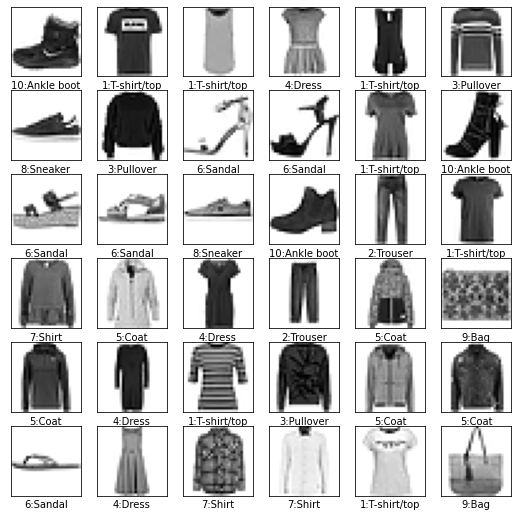

In [7]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Create list of class names
class_names =["1:T-shirt/top", 
              "2:Trouser", 
              "3:Pullover", 
              "4:Dress",
              "5:Coat",
              "6:Sandal", 
              "7:Shirt", 
              "8:Sneaker", 
              "9:Bag", 
              "10:Ankle boot"]

# Get first 36 images X from X_train_full_img
images = X_train_full_img[:36]

# Get first 36 images label from y_train_full_img
categories = y_train[0:36]

# Get the number of images we want to display
n_images = len(images)

# Get the number of images per row
images_per_row = 6

# Calculate the number of rows
n_rows = math.ceil(float(n_images)/images_per_row)

# Set the figure size
fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))

# Set the facecolor
fig.patch.set_facecolor('white')

# In each image
for i in range(n_images) :
    
    # Create a box
    plt.subplot(n_rows,images_per_row,i+1)
    
    # with no xtick
    plt.xticks([])
    # and with no ytick
    plt.yticks([])
    
    # Plot image on that box in gray scale and contrast the color
    plt.imshow(1-images[i]/255.0,cmap='gray')
    
    # Get the label of the image
    class_index = categories[i]
    
    # Get the label name and show in the graph
    plt.xlabel(class_names[class_index])
    
plt.show()

####  <span style="color:red">**Question 2.4**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [8]:
#Insert your code here and you can add more cells if necessary
### Build neural network architechture
# Import the tensorflow libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Initialise sequential neuron network model
dnn_model = Sequential()

# Add dense layers
dnn_model.add(Dense(units=20,  input_shape=(784,), activation='relu'))
dnn_model.add(Dense(units=25, activation='relu'))
dnn_model.add(Dense(units=10, activation='softmax'))



In [9]:
# Build the model and show model summary
dnn_model.build()
dnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 25)                525       
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
Total params: 16,485
Trainable params: 16,485
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Set the model parameters
dnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Fit the model on X_train with X_valid as validation set
history = dnn_model.fit(x=X_train, y=y_train, batch_size=64, epochs=20, validation_data=(X_valid, y_valid),verbose=1)

Epoch 1/20
844/844 [==============================] - 7s 6ms/step - loss: 0.6417 - accuracy: 0.7836 - val_loss: 0.4685 - val_accuracy: 0.8323
Epoch 2/20
844/844 [==============================] - 4s 5ms/step - loss: 0.4481 - accuracy: 0.8439 - val_loss: 0.4467 - val_accuracy: 0.8418
Epoch 3/20
844/844 [==============================] - 4s 5ms/step - loss: 0.4147 - accuracy: 0.8550 - val_loss: 0.4022 - val_accuracy: 0.8517
Epoch 4/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3929 - accuracy: 0.8617 - val_loss: 0.3984 - val_accuracy: 0.8572
Epoch 5/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3774 - accuracy: 0.8658 - val_loss: 0.3971 - val_accuracy: 0.8543
Epoch 6/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3661 - accuracy: 0.8702 - val_loss: 0.3813 - val_accuracy: 0.8630
Epoch 7/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3570 - accuracy: 0.8706 - val_loss: 0.3917 - val_accuracy: 0.86131s - l


In [11]:
# Evaluate model on testing data
loss, accuracy = dnn_model.evaluate(X_test,y_test)

# Show model accuracy
print('The accuracy of testing data is ',accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8613
The accuracy of testing data is  0.861299991607666


####  <span style="color:red">**Question 2.5**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first hidden layer $n_2 \in \{10, 20, 30\}$ and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the pattern $784 \rightarrow 15 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_2$ and $act$ are in their grids. Write the code to tune the hyper-parameters $n_2$ and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [13]:
# Prepare the data for hyperparameter tuning since we are going to use full_training dataset for cross-validation

# Scale the X_train_full data
X_train_CV = X_train_full/255.0
y_train_CV =  y_train_full.copy()

print(X_train_CV.shape,y_train_CV.shape )

(60000, 784) (60000,)


In [14]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier


# Define the create_model function
def create_model(n2,act):

    # Initialise sequential neuron network model
    dnn_model = Sequential()
    
    # Add dense layers
    dnn_model.add(Dense(units=15,  input_shape=(784,), activation= act))
    dnn_model.add(Dense(units=n2, activation=act))
    dnn_model.add(Dense(units=10, activation='softmax'))
    
    # Set the model parameters
    dnn_model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'],
                      optimizer=keras.optimizers.Adam(learning_rate=0.001))
    
    return dnn_model

# Create model
tune_model = KerasClassifier(model=create_model, epochs=20,batch_size=32, verbose = 1)

# Create parameter grid
params = {
    'model__n2': [10,20,30],
    'model__act': ['relu','sigmoid','tanh']
    
}

# Define GridSearchCV
grid = GridSearchCV(estimator=tune_model, param_grid=params, n_jobs=-1, verbose = 1,cv = 3)

# Fit GridSearchCV on X_train_CV
grid_output = grid.fit(X_train_CV, y_train_CV)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5979 - accuracy: 0.8036
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4129 - accuracy: 0.8519
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3836 - accuracy: 0.8620
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3646 - accuracy: 0.8688
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3543 - accuracy: 0.8709
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3445 - accuracy: 0.8749: 0s - loss: 0.3
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.8786
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3314 - accuracy: 0.8802
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3246 - accuracy: 0.8827
Epoch 

In [15]:
grid_output.cv_results_

{'mean_fit_time': array([ 93.37706153,  91.29708362, 108.98648095,  72.20309997,
        136.51824633,  93.50302545,  72.03127543,  73.88353014,
        111.8363235 ]),
 'std_fit_time': array([21.6011673 , 23.24758852, 27.49389101,  0.80226578,  1.07533983,
        30.89971717,  0.65179147,  0.87199778,  1.2720388 ]),
 'mean_score_time': array([2.06597988, 2.3533686 , 2.66043719, 1.91226681, 3.64900287,
        2.3977108 , 1.6987164 , 1.53951716, 1.95382301]),
 'std_score_time': array([0.19329305, 0.34091447, 0.40253319, 0.16107961, 0.14352901,
        0.64586721, 0.23940089, 0.33634945, 0.09874698]),
 'param_model__act': masked_array(data=['relu', 'relu', 'relu', 'sigmoid', 'sigmoid',
                    'sigmoid', 'tanh', 'tanh', 'tanh'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_model__n2': masked_array(data=[10, 20, 30, 10, 20, 30, 10, 20, 30],
              mas

In [25]:
# Show the best parameters
grid_output.best_params_

print(f'The best activation function is {grid_output.best_params_["model__act"]}')
print(f'The best number of node in layer 2 (n2) is {grid_output.best_params_["model__n2"]}')

The best activation function is tanh
The best number of node in layer 2 (n2) is 20


####  <span style="color:red">**Question 2.6**</span>. Experimenting with temperature-based softmax
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Given a temperature parameter $\tau>0$, we define a temperature-based $\tau\_softmax$ as follows
- Given $h=[h_m]_{m=1}^M$, $p = \tau\_softmax(h)$ if $p = [p_m]_{m=1}^M$ with $p_{m}=\frac{exp\left(\frac{h_{m}}{\tau}\right)}{\sum_{i=1}^{M}exp\left(\frac{h_{i}}{\tau}\right)}$ for $m \in \{1,2,...,M\}$.

Implement a feed-foward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(\tau\_softmax)$ for which we apply $\tau\_softmax$ to logits to transform it to predection probabilities. Set $\tau \in \{0.1, 0.5, 5\}$ respectively and train the above network with those temperature parameters.

In [18]:
#Insert your code here. You can add more cells if necessary
# https://stackoverflow.com/questions/44365593/change-temperature-in-rnn-to-generate-text
from keras.layers import Lambda

tau_list = [0.1,0.5,5]
models =[]
for tau in tau_list :
    dnn_model = Sequential()
    dnn_model.add(Dense(units=20,  input_shape=(784,), activation= 'relu'))
    dnn_model.add(Dense(units=25, activation='relu'))

    # Add temp layer, which hm is divided by tau before applying softmax
    dnn_model.add(Lambda(lambda x: x / tau))
    dnn_model.add(Dense(units=10, activation='softmax'))

    dnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
    
    # Fit the model on X_train with X_valid as validation set
    
    history = dnn_model.fit(x=X_train, y=y_train, batch_size=64, epochs=20, validation_data=(X_valid, y_valid),verbose=0)
    
    models.append(history)
    
    # Evaluate model on testing data
    loss, accuracy = dnn_model.evaluate(X_test,y_test)

    # Show model accuracy
    print(f'The accuracy of testing data is {accuracy} for tau = {tau}')
    

313/313 [==============================] - 1s 3ms/step - loss: 0.4035 - accuracy: 0.8642
The accuracy of testing data is 0.8641999959945679 for tau = 0.1
313/313 [==============================] - 1s 4ms/step - loss: 0.3848 - accuracy: 0.8626
The accuracy of testing data is 0.8626000285148621 for tau = 0.5
313/313 [==============================] - 1s 3ms/step - loss: 0.3846 - accuracy: 0.8628
The accuracy of testing data is 0.8628000020980835 for tau = 5
